# PIK3CA: Effects of Mutation on PIK3CA

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
#import altair as alt

#alt.renderers.enable('notebook')

<b> Import CPTAC </b>

In [2]:
import CPTAC

Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [3]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

### PIK3CA protein abundance with PIK3CA mutation

### Set gene and protein(s) of interest--in this case we are only looking at PIK3CA--and then create the "cross" dataframe, which contains all the information we need for plotting this gene

In [4]:
gene = "PIK3CA"
protList = ["PIK3CA"]
cross = CPTAC.merge_mutations(proteomics, protList[0], gene)
cross = cross[["Mutation", protList[0]]].dropna(axis=0)

### Perform a t-test with mutated and non-mutated protein levels

<b> Note: This analysis also includes the control group of healthy patients </b>

In [5]:
for protein in protList:
    mutated = cross.loc[cross["Mutation"] != "Wildtype"]
    wt = cross.loc[cross["Mutation"] == "Wildtype"]
    ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
    print("Test for " + protein + ": ")
    print(ttest)

Test for PIK3CA: 
Ttest_indResult(statistic=-5.228935496080108, pvalue=6.177143398248303e-07)


### We can now plot the data and see that PIK3CA has a significantly lower abundance when it is mutated 

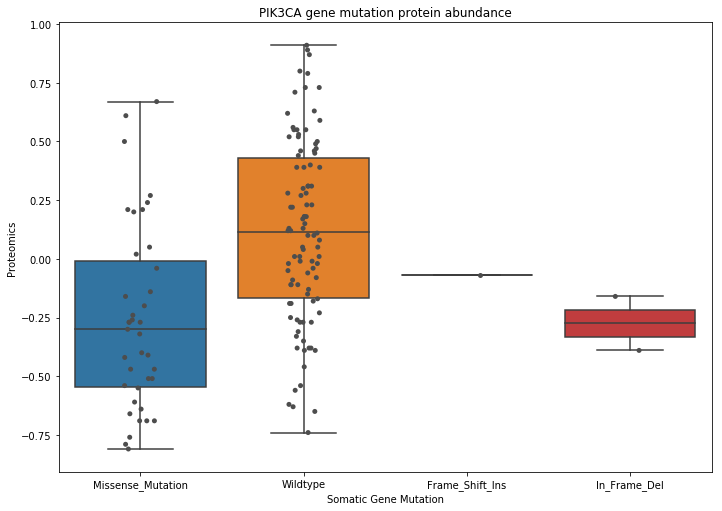

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("PIK3CA gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### Let's look at the p-value and plot for missense mutations specifically

In [7]:
mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
wt = cross.loc[cross["Mutation"] == "Wildtype"]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print("Test for " + protein + ": ")
print(ttest)

Test for PIK3CA: 
Ttest_indResult(statistic=-5.0965498342989255, pvalue=1.143604498150232e-06)


In [8]:
missense_only = cross.loc[(cross["Mutation"] == "Wildtype") | (cross["Mutation"] == "Missense_Mutation")]

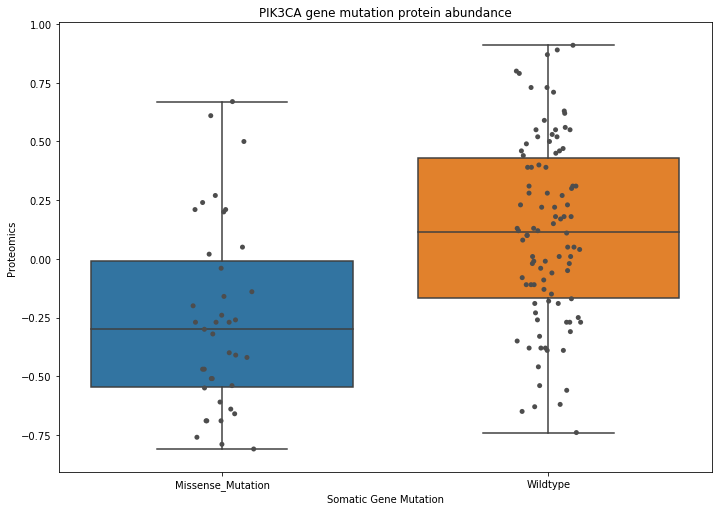

In [9]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=missense_only, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("PIK3CA gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=missense_only, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

## Protein abundance analysis (no control group)

### Set gene and protein(s) of interest--in this case we are only looking at PIK3CA--and then create the "cross" dataframe, which contains all the information we need for plotting this gene

In [10]:
gene = "PIK3CA"
protList = ["PIK3CA"]
cross = CPTAC.merge_mutations(proteomics, protList[0], gene)
cross = cross[["Mutation", protList[0]]].dropna(axis=0)

### Take patients 101 - 140, the control group, out of the data frame. 

In [11]:
cross = cross[:100]

### Perform a t-test with mutated and non-mutated protein levels

In [12]:
for protein in protList:
    mutated = cross.loc[cross["Mutation"] != "Wildtype"]
    wt = cross.loc[cross["Mutation"] == "Wildtype"]
    ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
    print("Test for " + protein + ": ")
    print(ttest)

Test for PIK3CA: 
Ttest_indResult(statistic=-2.3709474235794348, pvalue=0.019698800138688424)


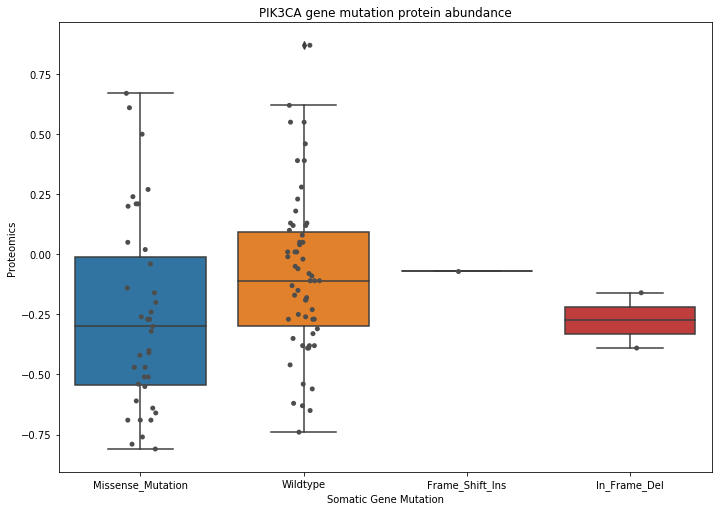

In [13]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("PIK3CA gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()